In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from keras.datasets import mnist


2024-02-18 11:38:50.039030: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 11:38:50.039068: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 11:38:50.040108: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 11:38:50.047366: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-18 11:38:51.987586: W tensorflow/compiler/tf2

# MNIST veri kümesini yükle

In [2]:

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


# Görüntüleri düzleştir


In [3]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


# Random Forest modelini oluştur


In [4]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğit
model.fit(X_train_flat, Y_train)


RandomForestClassifier(random_state=42)

# Modeli değerlendir


In [5]:
y_pred = model.predict(X_test_flat)
accuracy = accuracy_score(Y_test, y_pred)

print("Doğruluk (Accuracy): {:.2f}%".format(accuracy * 100))
print("\nSınıflandırma Raporu:\n", classification_report(Y_test, y_pred))


Doğruluk (Accuracy): 97.05%

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Rastgele 10 örneği görselleştirme


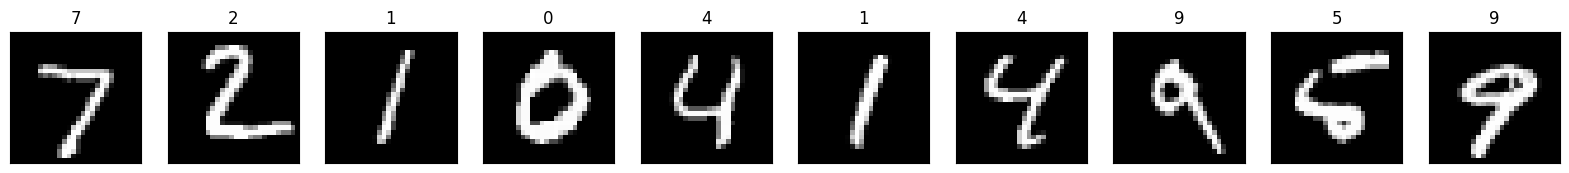

In [6]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))

for i in range(10):
    axes[i].set_title(y_pred[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

plt.show()
